In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import json

In [12]:
def mask_transform(mask_array, meta_list):
    frames = 100
    offset = 0

    for meta in meta_list:
        for i in range(frames):
            mask = mask_array[offset+i, :, :]
            masks = meta["frames"][i]["masks"]
            if "floor" in masks:
                mask[mask == masks["floor"]] = 0
            if "walls" in masks:
                mask[mask == masks["walls"]] = 32
            if "sky" in masks:
                mask[mask == masks["sky"]] = 64
            if "object_1" in masks:
                mask[mask == masks["object_1"]] = 96
            if "object_2" in masks:
                mask[mask == masks["object_2"]] = 96
            if "object_3" in masks:
                mask[mask == masks["object_3"]] = 96
            if "occluder_1" in masks:
                mask[mask == masks["occluder_1"]] = 192
            if "occluder_2" in masks:
                mask[mask == masks["occluder_2"]] = 224
    
        offset += 100        

In [13]:
def mask_transform_individual(mask, meta, frame):
    
    masks = meta["frames"][frame]["masks"]
    
    if "floor" in masks:
        mask[mask == masks["floor"]] = 0
    if "walls" in masks:
        mask[mask == masks["walls"]] = 32
    if "sky" in masks:
        mask[mask == masks["sky"]] = 64
    if "object_1" in masks:
        mask[mask == masks["object_1"]] = 96
    if "object_2" in masks:
        mask[mask == masks["object_2"]] = 96
    if "object_3" in masks:
        mask[mask == masks["object_3"]] = 96
    if "occluder_1" in masks:
        mask[mask == masks["occluder_1"]] = 192
    if "occluder_2" in masks:
        mask[mask == masks["occluder_2"]] = 224
    
    

In [14]:
def resize_correction(mask):
    
    mask[(0 < mask) & (mask <= 16)] = 0
    mask[(16 < mask) & (mask <= 48)] = 32
    mask[(48 < mask) & (mask <= 80)] = 64
    mask[(80 < mask) & (mask <= 208)] = 192
    mask[(208 < mask) & (mask <= 240)] = 224

In [22]:
def data_load(num_scenes, num_initial=1, x_size=0, y_size=0):

    base_path = "./train-reduced/train"
    frames = 100
    scene_count = 0

    image_list = []
    depth_list = []
    mask_list = []
    meta_list = []

    for scene in range(num_initial, num_initial+num_scenes):

        if os.path.exists("{}/{:05d}".format(base_path, scene)):
            
            filename_meta = "{}/{:05d}/status.json".format(base_path, scene)
            with open(filename_meta) as meta_json:
                meta = json.load(meta_json)
            meta_list.append(meta)

            for i in range(0, frames):

                filename_image = "{}/{:05d}/scene/scene_{:03d}.png".format(base_path, scene, i + 1)
                image = imread(filename_image)  # Numpy array with RGB format.
                if (x_size + y_size) != 0:
                    image = resize(image, (x_size, y_size), preserve_range=True)
                image_list.append(image)

                filename_depth = "{}/{:05d}/depth/depth_{:03d}.png".format(base_path, scene, i + 1)
                depth = imread(filename_depth, as_gray = True)  # Numpy array with grayscale format.
                if (x_size + y_size) != 0:
                    depth = resize(depth, (x_size, y_size), preserve_range=True)
                depth_list.append(depth)

                filename_mask = "{}/{:05d}/masks/masks_{:03d}.png".format(base_path, scene, i + 1)
                mask = imread(filename_mask, as_gray = True)  # Numpy array with grayscale format.                
                if (x_size + y_size) != 0:
                    mask_transform_individual(mask, meta, i)
                    mask = resize(mask, (x_size, y_size), preserve_range=True, order=0, anti_aliasing=False)
                    # resize_correction(mask)
                mask_list.append(mask)

            

            scene_count = scene_count + 1
        else:
            print("Error")

    image_array = np.array(image_list)
    depth_array = np.array(depth_list)
    mask_array = np.array(mask_list)

    depth_array = np.reshape(depth_array, (depth_array.shape[0], depth_array.shape[1], depth_array.shape[2], 1))
    mask_array = np.reshape(mask_array, (mask_array.shape[0], mask_array.shape[1], mask_array.shape[2], 1))

    print("Loaded scenes:", scene_count)
    print("Shape of image array:", image_array.shape)
    print("Shape of depth array:", depth_array.shape)
    print("Shape of mask array:", mask_array.shape)

    return image_array, depth_array, mask_array, meta_list, scene_count

In [23]:
image_array, depth_array, mask_array, meta_list, scene_count = data_load(1, x_size=64, y_size=64)

Loaded scenes: 1
Shape of image array: (100, 64, 64, 3)
Shape of depth array: (100, 64, 64, 1)
Shape of mask array: (100, 64, 64, 1)


[[64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]]
[[32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]
 [64.]]
[[32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32

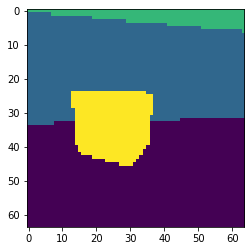

In [24]:
plt.imshow(mask_array[10, :, :, 0])

for el in mask_array[10, :, :, :]:
    
    print(el)

In [ ]:
def make_sets(data_array, scene_count):

    frames = 100

    train_scenes = int(scene_count * 0.7) *  frames
    vali_scenes = int(scene_count * 0.2) * frames
    test_scenes = (scene_count * frames - (train_scenes + vali_scenes))

    train_data = data_array[:train_scenes, :, :, :]
    vali_data = data_array[train_scenes:(train_scenes + vali_scenes), :, :, :]
    test_data = data_array[(train_scenes + vali_scenes):, :, : , :]

    print("Scenes for training: ", train_scenes)
    print("Scenes for validation: ", vali_scenes)
    print("Scenes for testing: ", test_scenes)

    return train_data, vali_data, test_data
